In [3]:
from keras.datasets import cifar10
import numpy as np

Using TensorFlow backend.


In [4]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [6]:
print('train data:', 'images:', x_img_train.shape,
                     'labels:', y_label_train.shape)
print(' test data:', 'images:', x_img_test.shape,
                     'labels:', y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
 test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [9]:
y_label_train.shape

(50000, 1)

In [7]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [8]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [14]:
model = Sequential(name='CNN')
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0       

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10, batch_size=128, verbose=1)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 67s 2ms/step - loss: 1.4937 - accuracy: 0.4644 - val_loss: 1.3256 - val_accuracy: 0.5698
Epoch 2/10
40000/40000 [==============================] - 69s 2ms/step - loss: 1.1490 - accuracy: 0.5916 - val_loss: 1.1581 - val_accuracy: 0.6198
Epoch 3/10
40000/40000 [==============================] - 66s 2ms/step - loss: 1.0010 - accuracy: 0.6446 - val_loss: 1.0203 - val_accuracy: 0.6769
Epoch 4/10
40000/40000 [==============================] - 66s 2ms/step - loss: 0.8955 - accuracy: 0.6842 - val_loss: 0.9336 - val_accuracy: 0.6941
Epoch 5/10
40000/40000 [==============================] - 67s 2ms/step - loss: 0.8138 - accuracy: 0.7147 - val_loss: 0.9173 - val_accuracy: 0.6950
Epoch 6/10
40000/40000 [==============================] - 67s 2ms/step - loss: 0.7256 - accuracy: 0.7462 - val_loss: 0.9109 - val_accuracy: 0.6906
Epoch 7/10
40000/40000 [==============================] - 66s 2ms/s

In [18]:
import matplotlib.pyplot as plt
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

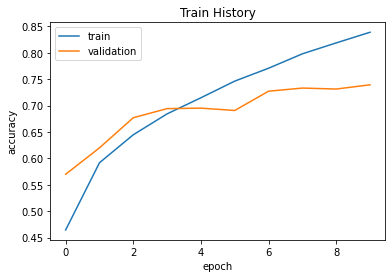

In [21]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

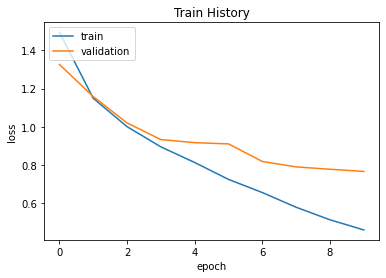

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

In [23]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('lose =', scores[0])
print('accuracy =', scores[1])

10000/10000 [==============================] - 2s 195us/step
lose = 0.7692855851173401
accuracy = 0.7348999977111816


In [24]:
prediction = model.predict_classes(x_img_test_normalize)

In [25]:
prediction[:10]

array([3, 8, 8, 8, 3, 6, 1, 6, 3, 1], dtype=int64)

In [27]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
              5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
def plot_image_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title = str(i) + '. ' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += ' => ' + label_dict[labels[i][0]]
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

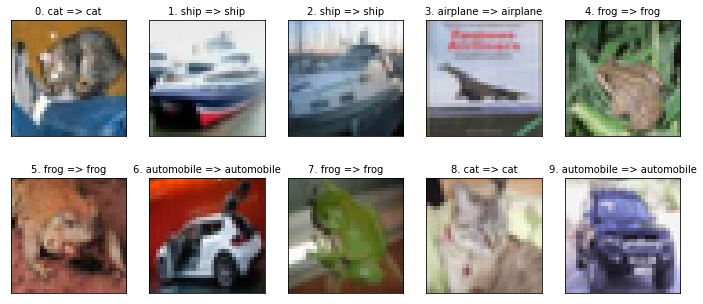

In [29]:
plot_image_labels_prediction(x_img_test, y_label_test, prediction, 0)

In [30]:
predicted_probability = model.predict(x_img_test_normalize)

In [31]:
def show_predicted_probability(y, prediction,
                               x_img, predicted_probability, i):
    print('label:', label_dict[y[i][0]],
          'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + 
              ' probability: %1.9f' % predicted_probability[i][j])

label: horse predict: horse


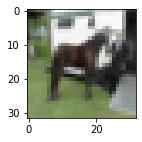

airplane probability: 0.044990230
automobile probability: 0.091239065
bird probability: 0.029734083
cat probability: 0.124624275
deer probability: 0.141818553
dog probability: 0.030025933
frog probability: 0.001398807
horse probability: 0.470038414
ship probability: 0.008021712
truck probability: 0.058108982


In [39]:
show_predicted_probability(y_label_test, prediction,
                           x_img_test, predicted_probability, 20)

In [35]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction,
            rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,687,34,59,32,27,4,19,9,85,44
1,4,879,6,11,1,3,11,6,19,60
2,38,5,590,76,136,42,64,27,14,8
3,7,8,58,616,84,125,52,28,10,12
4,8,3,33,59,768,22,54,39,12,2
5,4,3,43,227,78,565,30,36,6,8
6,2,6,20,56,45,19,844,2,5,1
7,9,2,27,48,86,43,11,765,2,7
8,20,39,14,25,12,3,9,1,853,24


In [ ]:
model.save('model/mdl_20220411.h5')